In [4]:
import numpy as np 
import matplotlib.pyplot as plt

Exercise 2: Diffusion through a crack

Simulate an unbiased random walk (P r(H ) = P r(T ) = 0.5) with some obstacles.

(a) Put a reflection barrier at x = –4, i.e., the walk may land at –4 but may not stay there, and the next step must be to –3. Plot a sample path and a histogram.

(b) Next,add a partial block at x=6, i.e.,at x=6 there is only a 0.25 chance of going to 7 and a 0.75 chance of going to 5 (same for 7 to 6 ). Plot a histogram.

These are results that are hard to get in any way other than by simulation.


In [5]:
def diffusion_crack(n, ref_barrier = True, partial_block = True): 
    randoms = np.random.uniform(size=(n-1))
    pos = [0]
    for _ in range(n-1):
        if ((pos[-1] == -4) and (ref_barrier == True)): 
            pos.append(-3)
            continue
        if ((pos[-1] == 6) and (partial_block == True)): 
            if randoms[_] < 0.25: 
                pos.append(7)
            else: 
                pos.append(5)
            continue
        if randoms[_] < 0.5: 
            pos.append(pos[-1]-1)
        else: 
            pos.append(pos[-1]+1)
    return pos

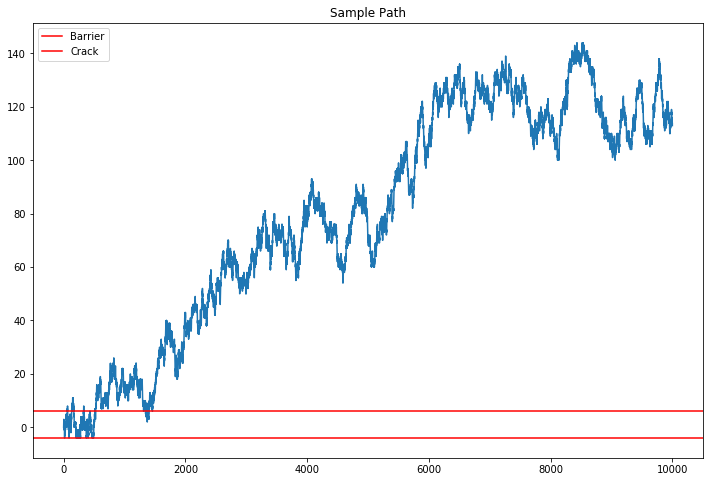

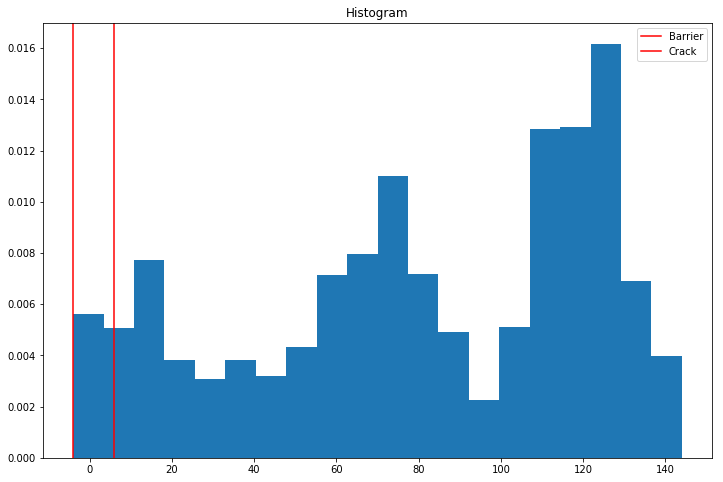

In [15]:
#Without crack

pos = diffusion_crack(10000, partial_block=False)
plt.figure(figsize=(12,8))
plt.plot(range(len(pos)), pos)
plt.title('Sample Path')
plt.axhline(y=-4, label='Barrier', color='r')
plt.axhline(y=6, label='Crack', color='r')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.hist(pos, density=True, bins=20)
plt.axvline(x=-4, label='Barrier', color='r')
plt.axvline(x=6, label='Crack', color='r')
plt.title('Histogram')
plt.legend()
plt.show()

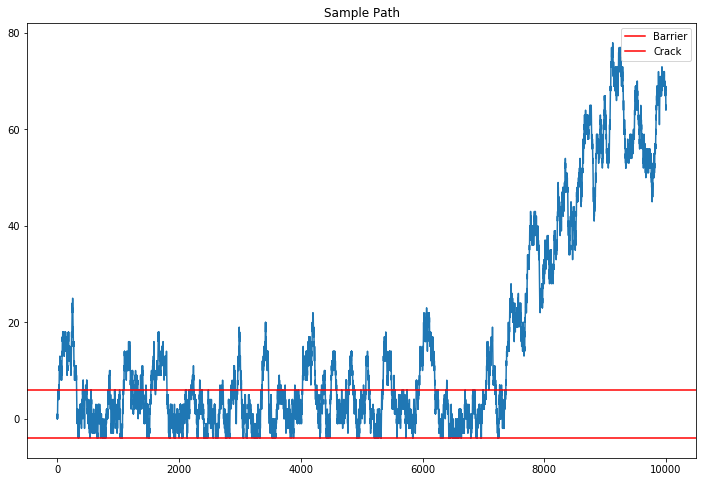

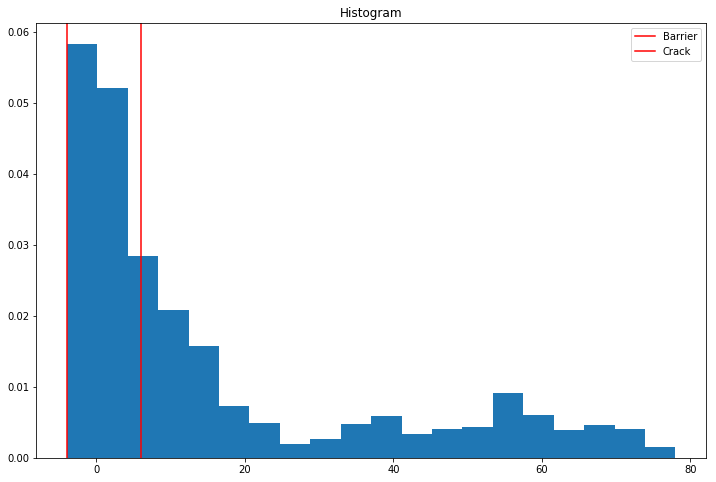

In [16]:
#With crack

pos = diffusion_crack(10000)
plt.figure(figsize=(12,8))
plt.plot(range(len(pos)), pos)
plt.title('Sample Path')
plt.axhline(y=-4, label='Barrier', color='r')
plt.axhline(y=6, label='Crack', color='r')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.hist(pos, density=True, bins=20)
plt.title('Histogram')
plt.axvline(x=-4, label='Barrier', color='r')
plt.axvline(x=6, label='Crack', color='r')
plt.legend()
plt.show()

Exercise 4: Wiener process / Brownian motion

● Simulate a random walk in the plane as follows.

○ Start at the origin.

○ From any given position, choose a direction from 0 to 360 degrees equally likely, that is, uniformly on [0, 360).

○ Next, choose a step size according to a Gaussian (normal) distribution with mean 0 and variance σ2.

○ Advance to that position and continue.

● Take σ2 to be, variously, 0.5, 1, 2, the idea being to see what effect variance has on the walk.

● Take the number of steps to be, variously, 20, 400, 1600, again to gauge the effect.

● Show a typical walk (i.e., a sample path) for one of the 1600 (or more) steps. Also, instead of histogramming, show a density plot, that is for several walkers, plot a point in the plane where the walker stops.

In [41]:
def rw_brownian(n, sigma): 
    pos_x = [0]
    pos_y = [0]
    for _ in range(n-1):
        angle = np.random.uniform(0, 2*np.pi)
        step = np.random.normal(loc=0, scale=sigma)
        pos_x.append(pos_x[-1] + np.cos(angle)*step)
        pos_y.append(pos_y[-1] + np.sin(angle)*step)
    return pos_x, pos_y    

a, b = rw_brownian(10,0.1 )
a 

[0,
 0.10730596312699531,
 0.09840530710472233,
 0.15294001234726237,
 0.18339868738559417,
 0.23325930289724886,
 0.27604825311192416,
 0.26281611770461016,
 0.36690634144445244,
 0.411252412638956]

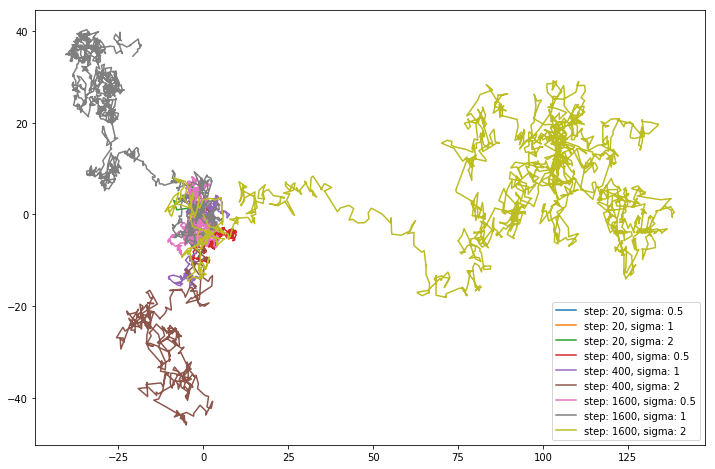

In [46]:
plt.figure(figsize=(12,8))

ns = [20, 400, 1600]
sigmas = [0.5, 1, 2]
for n in ns: 
    for sigma in sigmas: 
        pos_x, pos_y = rw_brownian(n, sigma)
        plt.plot(pos_x, pos_y, label="step: {}, sigma: {}".format(n, sigma))
plt.legend()
plt.show()

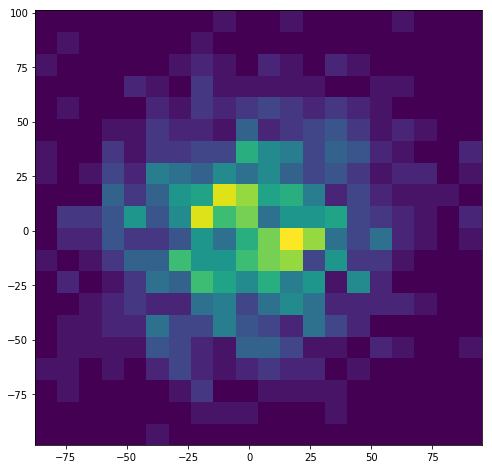

In [51]:
stop_x, stop_y = [], []
for _ in range(1000): 
    pos_x, pos_y = rw_brownian(2000, 1)
    stop_x.append(pos_x[-1])
    stop_y.append(pos_y[-1])
    
plt.figure(figsize=(8,8))
plt.hist2d(stop_x, stop_y, bins=(20,20))
plt.show()

Exercise 9a: Diffusion in the plane

Starting at the origin in the plane, carry out a random walk on the lattice of integer coordinate points over the square [–20, 20] [–20, 20]. Assume that there is a square hole whose boundary is
(13, 7), (14, 7), (14, 8), and (13, 8). Walks that reach this hole are absorbed, along with any walk which reaches the boundary. Show the distribution of final positions for walks of various steps and especially the fraction that enters the hole.

In [54]:
def rw_plane_with_hole(n):
    randoms_x = np.random.uniform(size=n-1)
    randoms_y = np.random.uniform(size=n-1)
    pos_x, pos_y = [0], [0]
    in_hole = 0
    for _ in range(n-1): 
        if ((pos_x[-1] == 20) or (pos_x[-1] == -20) or (pos_y[-1] == 20) or (pos_y[-1] == -20)):
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1])
            continue
        if (((pos_x[-1] == 13) or (pos_x[-1] == 14)) and ((pos_y[-1] == 7) or (pos_y[-1] == 8))):
            pos_x.append(pos_x[-1])
            pos_y.append(pos_y[-1])
            in_hole += 1
            continue
        if randoms_x[_] < 0.5: 
            pos_x.append(pos_x[-1]-1)
        else: 
            pos_x.append(pos_x[-1]+1)
        if randoms_y[_] < 0.5: 
            pos_y.append(pos_y[-1]-1)
        else: 
            pos_y.append(pos_y[-1]+1)
            
    return pos_x[-1], pos_y[-1], in_hole

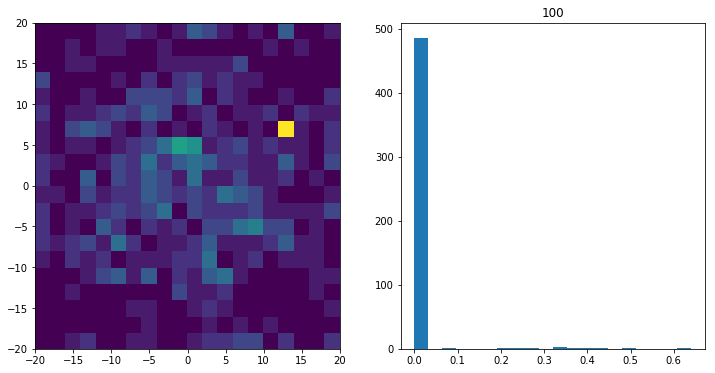

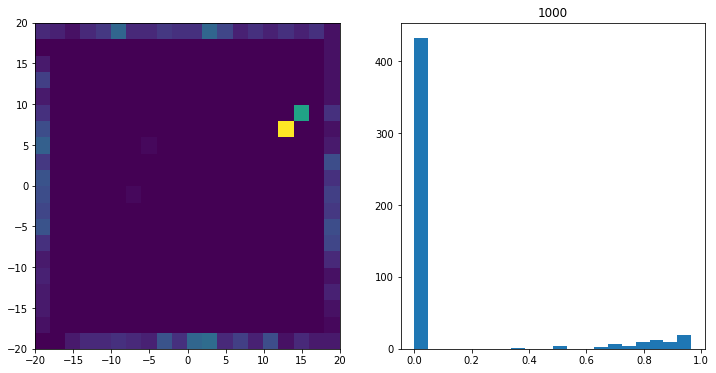

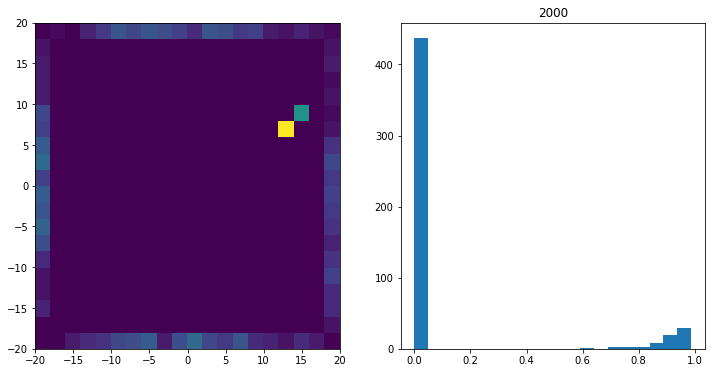

In [60]:
for n in [100, 1000, 2000]: 
    plt.figure(figsize=(12,6))
    stops_x, stops_y, in_holes = [], [], []
    for _ in range(500): 
        stop_x, stop_y, in_hole = rw_plane_with_hole(n)
        stops_x.append(stop_x)
        stops_y.append(stop_y)
        in_holes.append(in_hole/n)
    plt.subplot(1, 2, 1)
    plt.hist2d(stops_x, stops_y, bins=(20,20))
    plt.subplot(1, 2, 2)
    plt.hist(in_holes, bins=20)
    plt.title(n)
    plt.show()

In [1]:
#13.2 
import numpy as np
def kelly_strategy(n): 
    money = [250]
    
    for _ in range(n): 
        if money[-1] == 0: 
            money.append(0)
            continue
        if money[-1] >= 2500: 
            money.append(money[-1])
            continue
        if np.random.uniform() < 0.6: 
            money.append(money[-1]*(1+0.2))
        else: 
            money.append(money[-1]*(1-0.2))
    return money
        

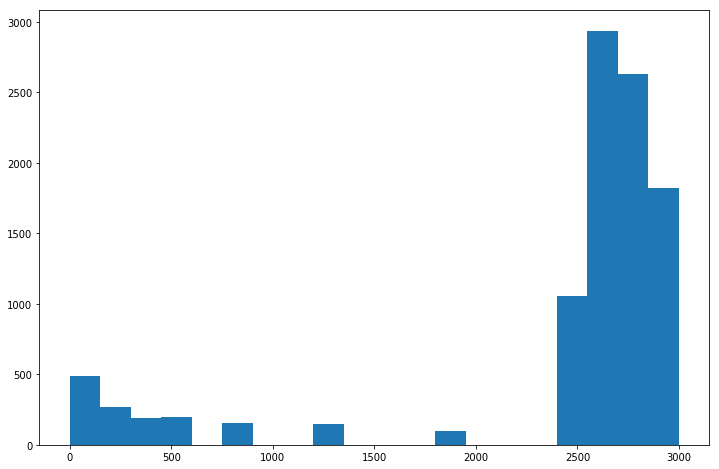

Mean end game: 2373.236287018569
95% CI end game: [  72.06130554 2981.95067499]


In [7]:
import matplotlib.pyplot as plt
end_game = []
for _ in range(10000): 
    money = kelly_strategy(200)
    end_game.append(money[-1])

plt.figure(figsize=(12,8))
plt.hist(end_game, bins=20)
plt.show()

print('Mean end game:', np.mean(end_game))
print('95% CI end game:', np.percentile(end_game, (2.5, 97.5)))